In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from numpy import floor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import warnings
warnings.simplefilter(action='ignore')

In [3]:
data_bunch = load_wine(as_frame = True)
print(type(data_bunch))

<class 'sklearn.utils.Bunch'>


In [4]:
data = data_bunch.data
data = pd.DataFrame(data)
data
#data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
df=data

### TASK - 1

In [6]:
data= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
data['classes']=data_bunch.target
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,classes
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


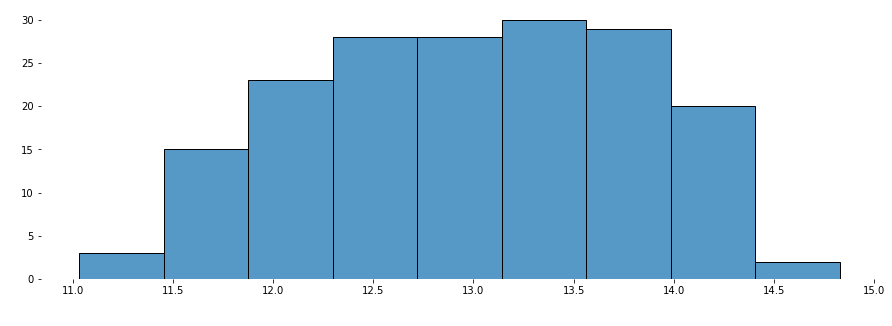

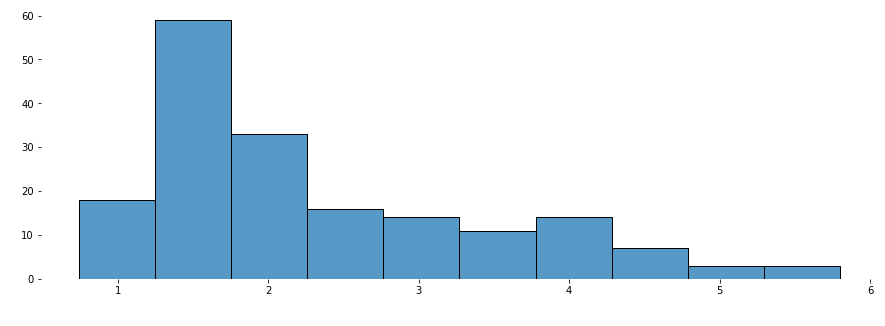

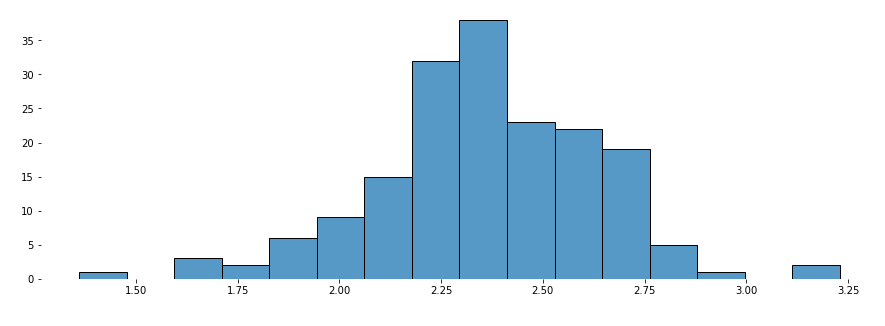

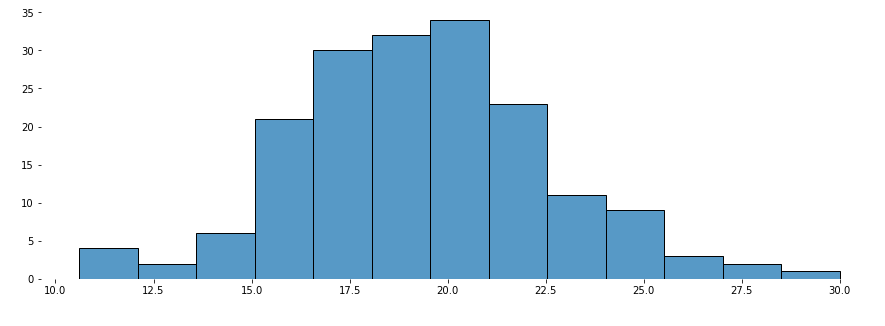

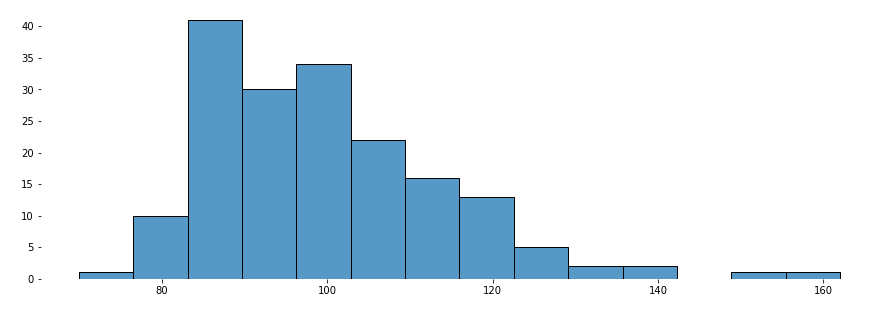

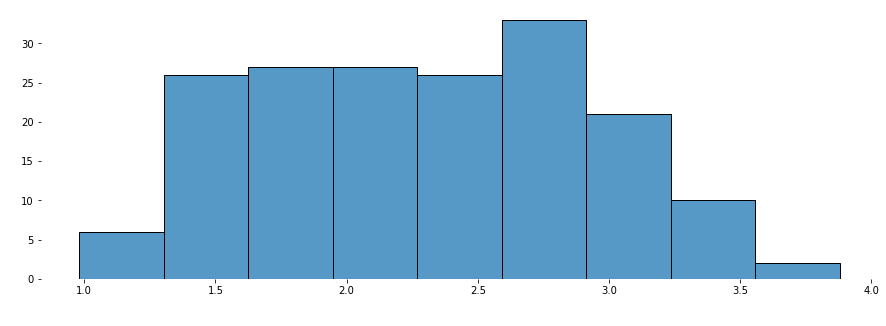

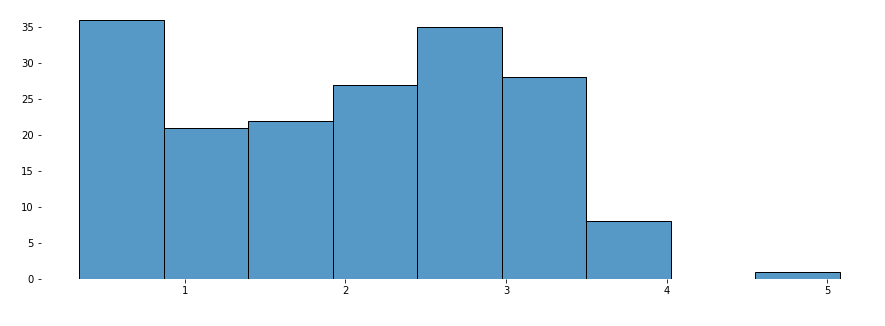

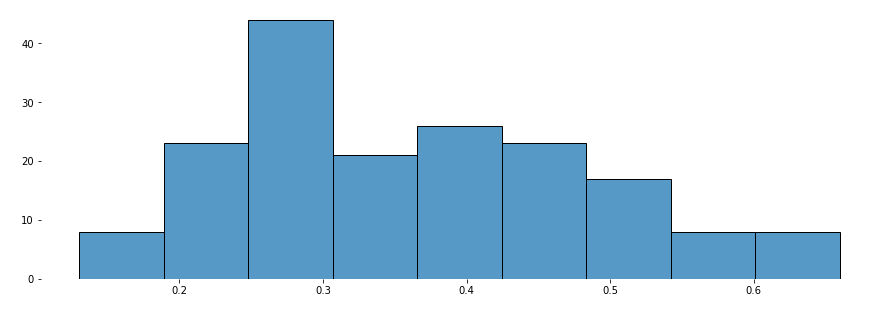

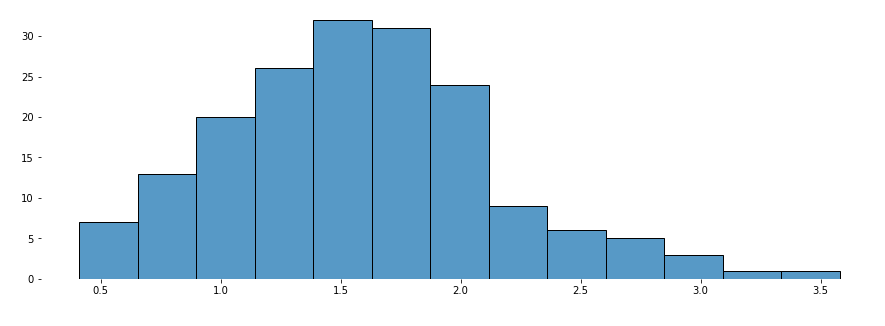

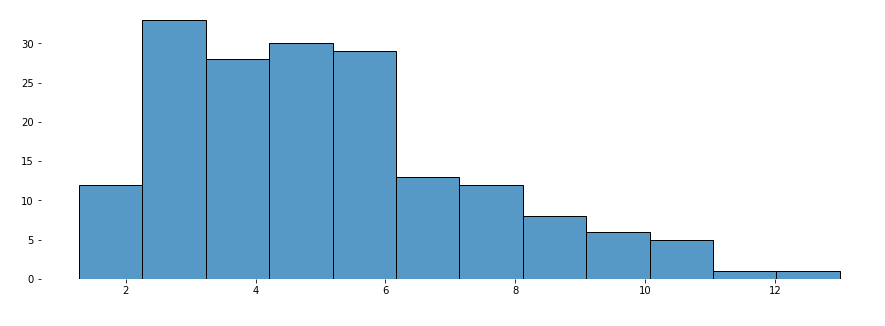

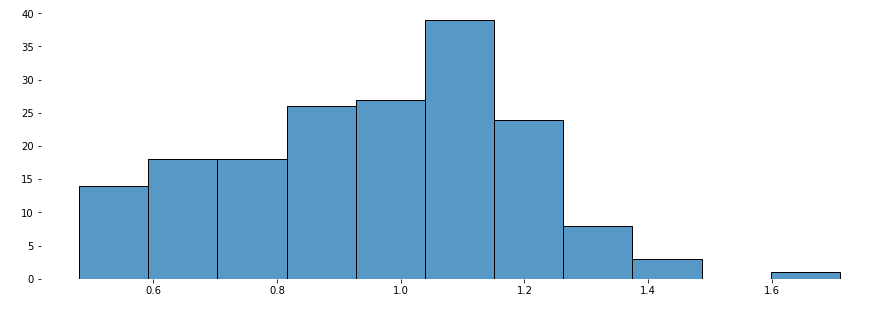

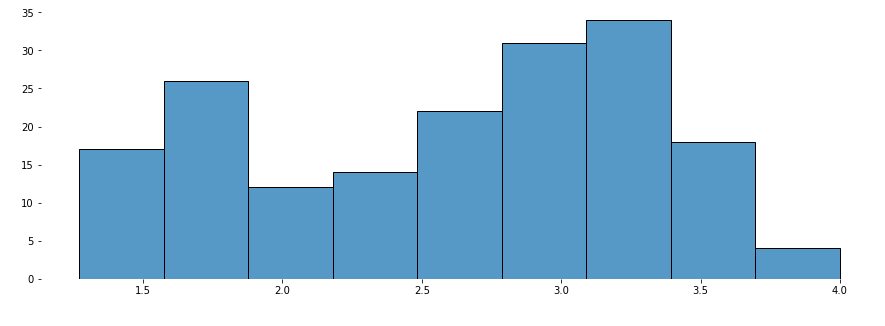

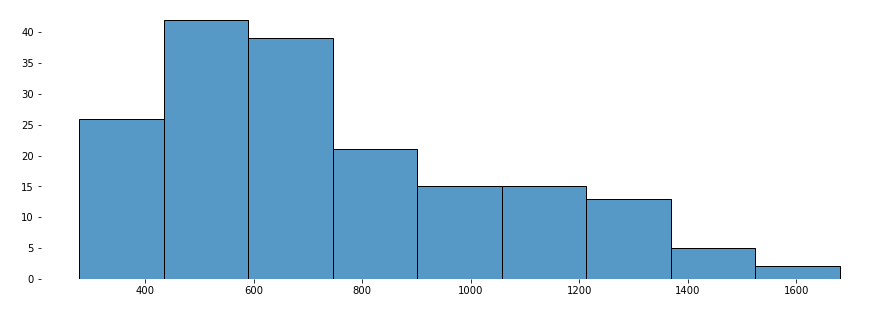

In [34]:
z = ['alcohol','malic_acid','ash','alcalinity_of_ash', 'magnesium', 'total_phenols','flavanoids','nonflavanoid_phenols',
     'proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']

for i in z:
    fig, ax = plt.subplots(1,1, figsize=(15, 5))
    sns.histplot(x = df[i])
    plt.xlabel(' ', fontsize=20)
    plt.ylabel(' ')
    plt.yticks(fontsize=10)
    plt.box(False)

In [12]:
data.shape

(178, 15)

### TASK - 2

In [13]:
from sklearn.model_selection import train_test_split
X_data=data.iloc[:,1:]
Y_data=data.iloc[:,0]
X_train, X_test,Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.20, random_state=42)


In [14]:
print(X_train)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')
print(Y_train)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')
print(X_test)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')
print(Y_test)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

         1     2     3     4    5     6     7     8     9     10    11    12  \
158  14.34  1.68  2.70  25.0   98  2.80  1.31  0.53  2.70  13.00  0.57  1.96   
137  12.53  5.51  2.64  25.0   96  1.79  0.60  0.63  1.10   5.00  0.82  1.69   
98   12.37  1.07  2.10  18.5   88  3.52  3.75  0.24  1.95   4.50  1.04  2.77   
159  13.48  1.67  2.64  22.5   89  2.60  1.10  0.52  2.29  11.75  0.57  1.78   
38   13.07  1.50  2.10  15.5   98  2.40  2.64  0.28  1.37   3.70  1.18  2.69   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
71   13.86  1.51  2.67  25.0   86  2.95  2.86  0.21  1.87   3.38  1.36  3.16   
106  12.25  1.73  2.12  19.0   80  1.65  2.03  0.37  1.63   3.40  1.00  3.17   
14   14.38  1.87  2.38  12.0  102  3.30  3.64  0.29  2.96   7.50  1.20  3.00   
92   12.69  1.53  2.26  20.7   80  1.38  1.46  0.58  1.62   3.05  0.96  2.06   
102  12.34  2.45  2.46  21.0   98  2.56  2.11  0.34  1.31   2.80  0.80  3.38   

       13  classes  
158   660        2

In [15]:
from sklearn.preprocessing import MinMaxScaler                

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(scaled)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
print(scaled)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


### TASK - 3 

In [17]:
import numpy as np
import pandas as pd 
from sklearn import datasets, neighbors
import matplotlib.pyplot as plt
from ipywidgets import interactive

%matplotlib inline

In [76]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("when k = 5, accuracy model = ", metrics.accuracy_score(y_test, y_pred))

when k = 5, accuracy model =  0.7142857142857143


In [77]:
error = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
error

[0.14285714285714285,
 0.3333333333333333,
 0.23809523809523808,
 0.23809523809523808,
 0.2857142857142857,
 0.23809523809523808,
 0.23809523809523808,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.23809523809523808,
 0.23809523809523808,
 0.2857142857142857,
 0.2857142857142857,
 0.3333333333333333,
 0.2857142857142857,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333]

In [79]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    
    print('when k = ',k , 'or ',round(knn.score(X_test, y_test)*100,0),'%', ";", pred_k)

In [80]:
for i in range(1,21):
    KNN(i)

when k =  1 or  86.0 % ; [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
when k =  2 or  67.0 % ; [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
when k =  3 or  76.0 % ; [0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
when k =  4 or  76.0 % ; [0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
when k =  5 or  71.0 % ; [0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
when k =  6 or  76.0 % ; [0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
when k =  7 or  76.0 % ; [0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
when k =  8 or  71.0 % ; [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
when k =  9 or  71.0 % ; [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
when k =  10 or  71.0 % ; [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
when k =  11 or  76.0 % ; [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
when k =

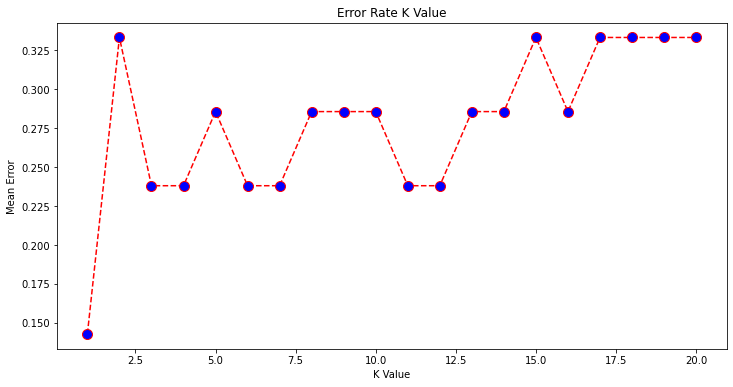

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [46]:
def knn(k):
    wine = datasets.load_wine()
    
    X = wine.data[:, 0:2]
    y = wine.target

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X, y)

    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.2)

    plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (k))
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])

    plt.show()

In [47]:
interactive_plot = interactive(knn, k=(1, 20, 2))
output = interactive_plot.children[-1]            
interactive_plot

interactive(children=(IntSlider(value=9, description='k', max=20, min=1, step=2), Output()), _dom_classes=('wi…

In [61]:
#B

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
knn.predict(X_test)[0:5]        

array([0, 1, 1, 0, 1])

In [63]:
knn.score(X_test, y_test)  

0.7333333333333333

In [64]:
from sklearn.model_selection import cross_val_score
import numpy as np
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X_test, y_test, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.88888889 0.88888889 0.55555556 0.77777778 0.77777778]
cv_scores mean:0.7777777777777777


In [65]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [66]:
knn_gscv.best_params_

{'n_neighbors': 2}

In [67]:
knn_gscv.best_score_

0.8222222222222222

In [68]:
#C

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
 
wine = datasets.load_wine()
 
X = wine.data
y = wine.target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
 
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
accuracy = svm_model_linear.score(X_test, y_test)
 
cm = confusion_matrix(y_test, svm_predictions)

In [69]:
for input, prediction, label in zip (X_test, svm_predictions, y_test):
    if prediction != label:
        print(input, 'has been classified as ', prediction, 'and should be ', label)

[ 12.64   1.36   2.02  16.8  100.     2.02   1.41   0.53   0.62   5.75
   0.98   1.59 450.  ] has been classified as  2 and should be  1


### TASK - 4 

In [87]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

def get_encoded_df(df, columns=None):
    if columns == None:
        columns = df.columns

    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    return df


df_encoded = get_encoded_df(df)
df_encoded.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,118,43,44,12,45,73,107,11,87,81,49,120,94
1,65,49,18,1,21,68,91,9,31,56,50,102,92
2,63,71,63,32,22,73,115,13,96,83,48,86,101
3,121,59,49,21,33,95,122,7,84,109,30,104,116
4,67,81,75,45,37,73,89,20,66,53,49,73,66


In [88]:
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(10)


features = ['alcohol','malic_acid','ash','alcalinity_of_ash', 'magnesium', 'total_phenols','flavanoids','nonflavanoid_phenols',
     'proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']

n_samples = 100

alcohol = 3 + rng.standard_normal(n_samples)*1
malic_acid= 20 + rng.standard_normal(n_samples) * 2
ash = 50 + rng.standard_normal(n_samples) * 20
alcalinity_of_ash = 15 + rng.standard_normal(n_samples) * 5

X = np.array([alcohol, malic_acid, ash, alcalinity_of_ash]).T
print(X[:10])

y = np.ones((X.shape[0]))
y[X[:, 0] > 3] = 0
y[X[:, 2] > 80] = 0
y[X[:, 3] > 20] = 0
print(y[:10])

[[ 2.32296119 21.70059341 54.87405605 15.4944916 ]
 [ 3.41413218 21.54532108 51.53245275 17.18854998]
 [ 3.23707832 21.77149719 73.90922107 11.95156133]
 [ 4.96267253 21.90437297 51.51121286 12.25996943]
 [ 2.34733131 18.35023105 44.1602709  15.88123994]
 [ 1.06532693 18.78603795 52.26702035 15.94283352]
 [ 2.86023751 18.13200112 31.34489393 14.17547395]
 [ 3.74655845 21.57995196 35.48335291 18.53653097]
 [ 1.30705112 22.80668989 23.66683863 12.66981262]
 [ 4.64058039 20.95714119 85.69323524 15.79684418]]
[1. 0. 0. 0. 1. 1. 1. 0. 1. 0.]


In [89]:
X_train, y_train = X[:79], y[:79]
X_test, y_test = X[79:], y[79:]

In [90]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [91]:
gnb.predict(X_test) 

array([1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0.])

In [92]:
y_test          

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1.])

### Result: 

The classifier is fine, there is only three wrong prediction.